In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date    : May-31-21 21:57
# @Author  : Kan HUANG (kan.huang@connect.ust.hk)

import os
import argparse
from datetime import datetime
import json
import torch
from torchvision import datasets, transforms, models
DATASETS_ROOT = "~/.datasets"

In [15]:

parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
parser.add_argument('--model-name', type=str, default="LeNet-5")
parser.add_argument('--dataset-name', type=str, default="MNIST")
parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                    help='input batch size for training (default: 64)')
parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                    help='input batch size for testing (default: 1000)')
parser.add_argument('--epochs', type=int, default=14, metavar='N',
                    help='number of epochs to train (default: 14)')
parser.add_argument('--lr', type=float, default=1.0, metavar='LR',
                    help='learning rate (default: 1.0)')
parser.add_argument('--gamma', type=float, default=0.7, metavar='M',
                    help='Learning rate step gamma (default: 0.7)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')
parser.add_argument('--seed', type=int, default=1, metavar='S',
                    help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='how many batches to wait before logging training status')

parser.add_argument('--save-model', action='store_true', default=False,
                    help='For Saving the current Model')
args = parser.parse_args(
    args=["--epochs", "500", "--batch-size", "32", "--no-cuda"])
args


Namespace(batch_size=32, dataset_name='MNIST', epochs=500, gamma=0.7, log_interval=10, lr=1.0, model_name='LeNet-5', no_cuda=True, save_model=False, seed=1, test_batch_size=1000)

In [16]:
# E.g., WaveNet_LSTM_pm25_0_stride_2_official_20220214-050157

date_time = datetime.now().strftime("%Y%m%d-%H%M%S")
output_dir = os.path.join("output", f"{args.model_name}_{args.dataset_name}_{date_time}")
os.makedirs(output_dir, exist_ok=True)
output_dir


'output/LeNet-5_MNIST_20230519-155740'

In [17]:
with open(os.path.join(output_dir, 'config.json'), 'w', encoding='utf8') as json_file:
    json_file.write(json.dumps(vars(args)))


### Load MNIST

Load MNIST data

In [18]:
batch_size = 32
use_cuda = False
no_norm = False

kwargs = {'batch_size': batch_size}
_ = kwargs.update({'num_workers': 1, 'pin_memory': True, 'shuffle': True}) if use_cuda else None

# prepare transform
if no_norm:
    print("No normalization.")
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
else:
    print("Normalize MNIST input.")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

# Load mnist data
data_root = os.path.expanduser("~/.datasets")
mnist_train = datasets.MNIST(
    data_root, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(
    data_root, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_train, **kwargs)
test_loader = torch.utils.data.DataLoader(mnist_test, **kwargs)

Normalize MNIST input.


In [19]:
print(mnist_train.train_data.dtype)

torch.uint8


/opt/miniconda3/envs/torch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [22]:
X, y = next(iter(train_loader))

In [25]:
print(X.shape)
print(y.shape)
print(y)

torch.Size([32, 1, 28, 28])
torch.Size([32])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])


In [ ]:
x = X[0][0]
print(f"x.min(): {x.min()}, x.max(): {x.max()}")

x.min(): 0.0, x.max(): 1.0


In [ ]:
x_int = (255*x).int()
x_hat = x_int/255
(x_hat-x).mean()

tensor(0.)

In [ ]:
import matplotlib.pyplot as plt

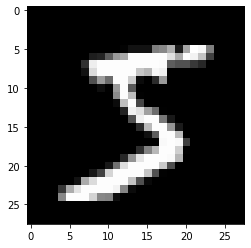

In [ ]:
plt.imshow(x, cmap="gray")

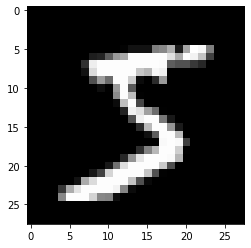

In [ ]:
x_hat = x * 0.3081 + 0.1307 # variance and mean
plt.imshow(x_hat, cmap="gray")

In [ ]:
print(x_hat.min(), x_hat.max())

tensor(0.) tensor(1.)
